# Step1:Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step2:Loading the dataset

In [3]:
data=pd.read_csv("hotel_bookings 2.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


# Exploratory Data Analysis and Data Cleaning


In [4]:
data.shape

(119390, 32)

In [5]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# will convert reservation_status_date in datetime so that we can focus it.
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'],format="%d/%m/%Y")

In [8]:
# Using describe method for categorical/object column to get summary statistics
data.describe(include='object')  # will define unique number

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [9]:
for col in data.describe(include='object').columns:
    print(col)
    print(data[col].unique())
    print("*"*100)

hotel
['Resort Hotel' 'City Hotel']
****************************************************************************************************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
****************************************************************************************************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
****************************************************************************************************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [10]:
# missing values
data.isnull().sum().sort_values(ascending=False)
# we will remove company column because it has too much null values that they can not be handled
# we have to remove agent column as it is of no work
# we will drop rows having null in children and country as they are 488 out of 119k+ rows and will not effect.


company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

In [11]:
data.drop(['company','agent'],axis=1, inplace=True)
data.dropna(inplace=True)

In [12]:
data.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
# Checking summary statistics of numerical columns
data.describe()  # by default it provide of numerical columns

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [14]:
# data=data[data['adults']<10]  # will consider values>=10 as outlier so it will remove them from data as they are only 12 in number
# data=data[data['children']<6]# will consider values>=3 as outlier so it will remove it from data as it is only 1 in number
# data[data['babies']<3]# will consider values>=3 as outlier so it will remove them from data as they are only 2 in number
# data=data[data['previous_cancellations']<20]
# data=data[data['previous_bookings_not_canceled']<65]
# data=data[data['booking_changes']<20]
# data=data['days_in_waiting_list]<100]  # considers 100 as threshold
# data=data[data['adr']<3000]
# data=data[data['required_car_parking_spaces']<5]


# this method is not good for accuracy and serious modelling for this we need iqr/z-score method.

<Axes: >

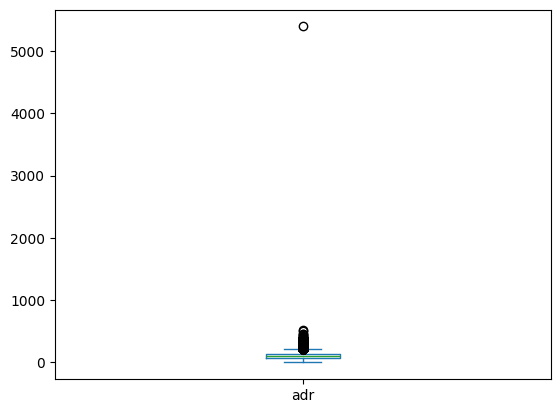

In [15]:
# not removing as in assumption we considered there are no outliers
# creating box plot just to get idea of outliers in adr column
data['adr'].plot(kind='box')
# but i will remove outliers of all columns

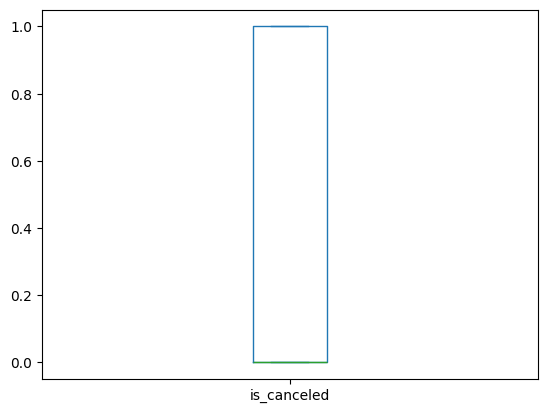

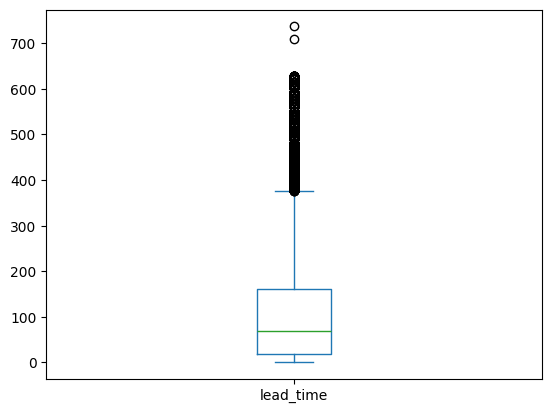

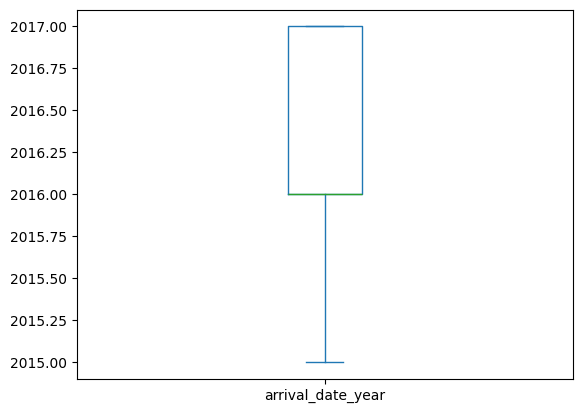

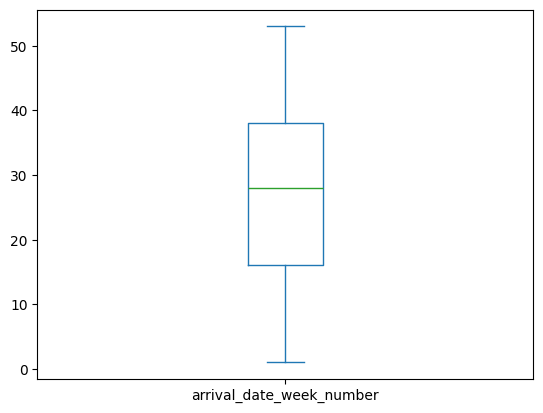

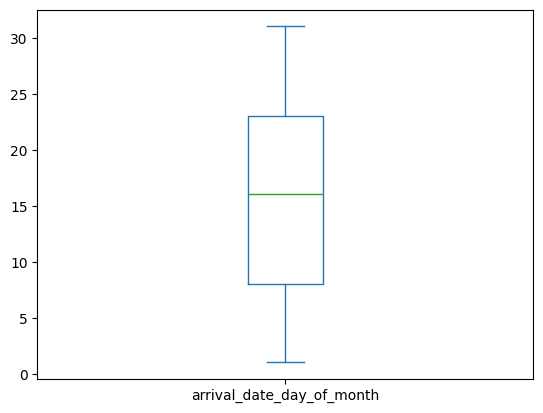

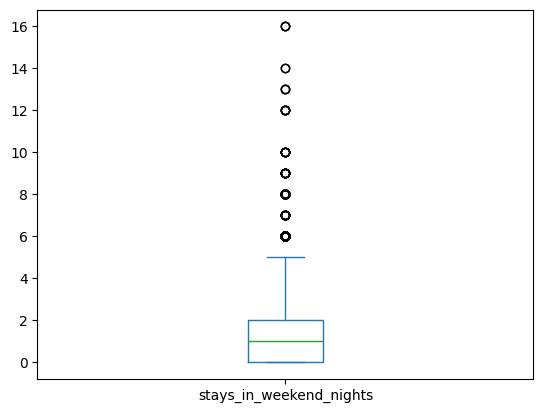

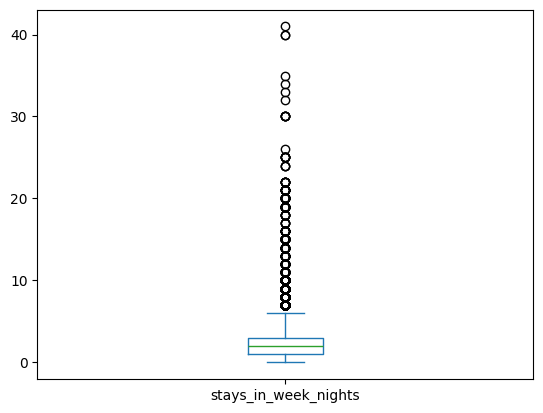

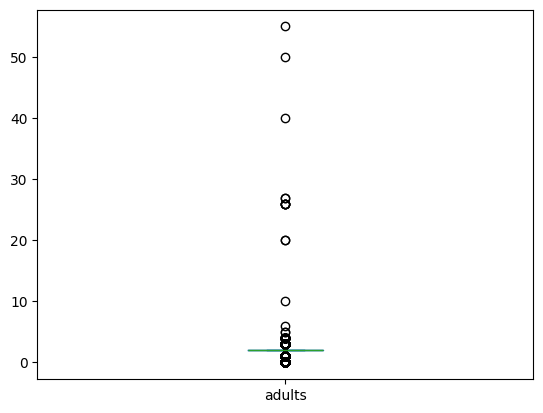

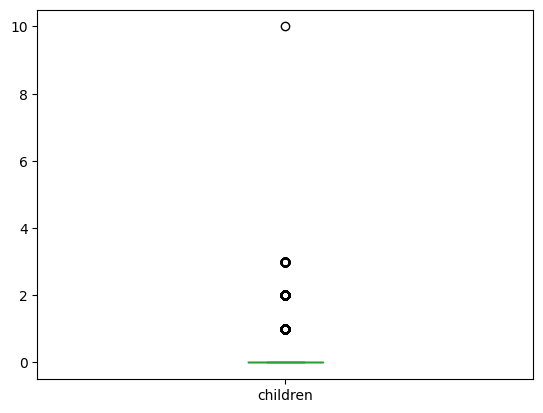

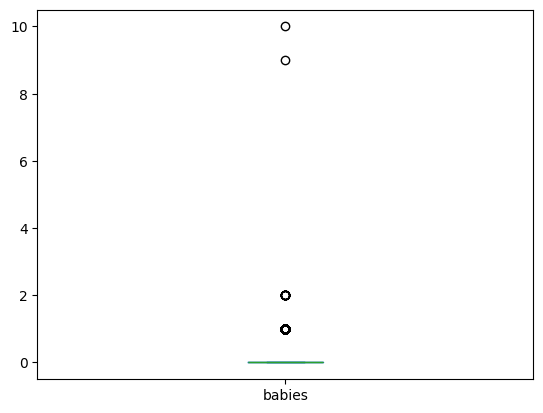

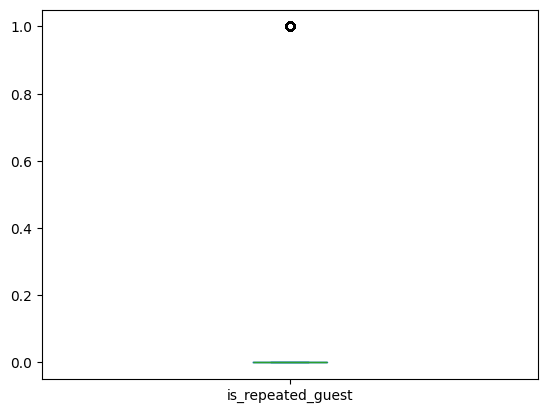

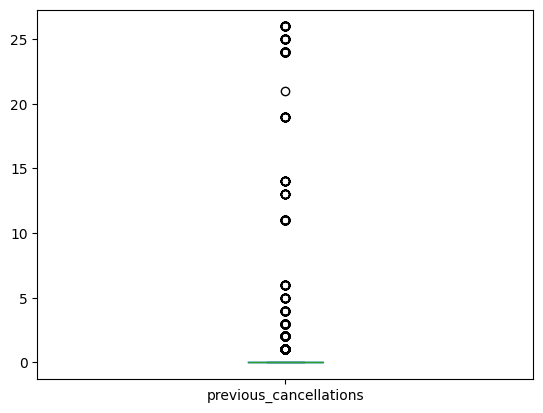

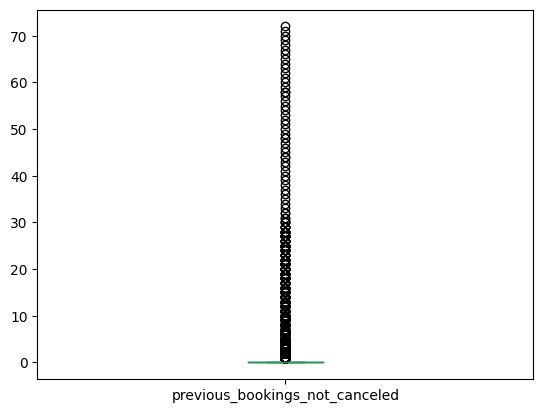

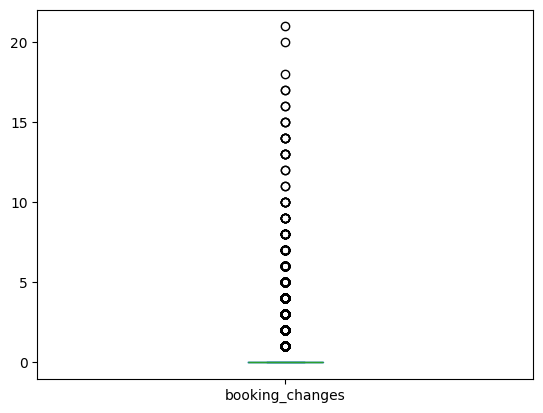

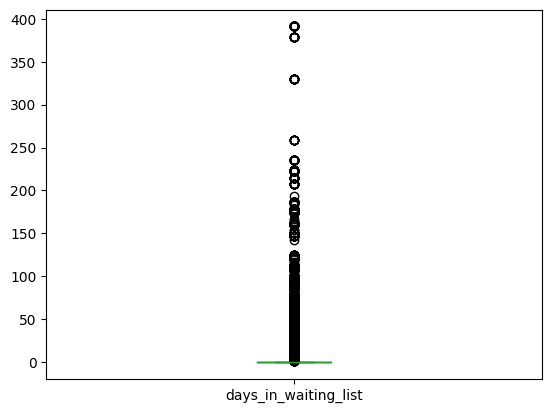

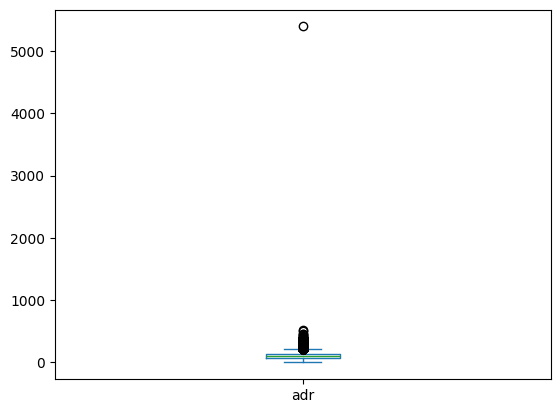

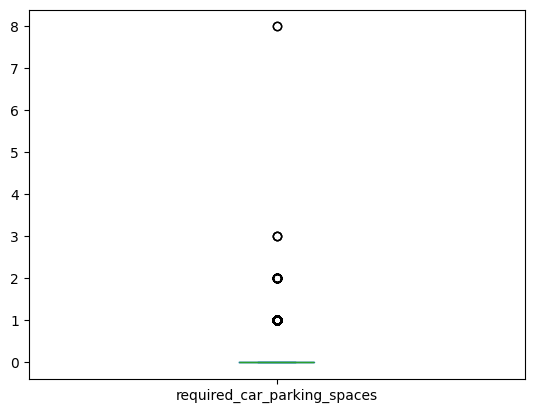

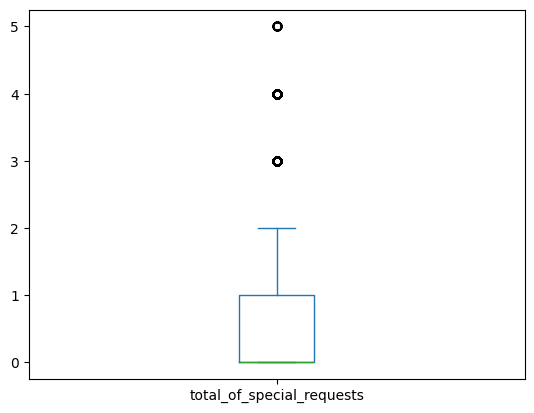

TypeError: no numeric data to plot

In [16]:
total=len(data.describe().columns)
for each in data.describe().columns:
    data[each].plot(kind='box')
    plt.show()
    if each==None:
        break
    


# Data Analysis and Visualizations

is_canceled
0    0.628648
1    0.371352
Name: proportion, dtype: float64


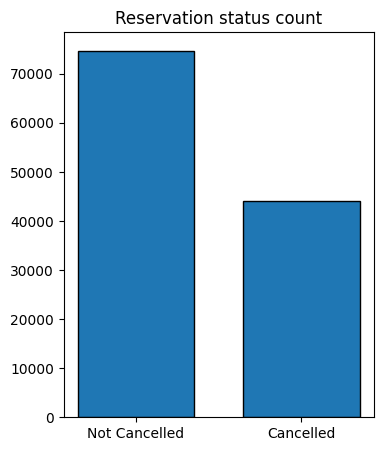

In [ ]:
cancelled_perc=data['is_canceled'].value_counts(normalize=True)  # normalize=True will return in percentage
print(cancelled_perc)

plt.figure(figsize=(4,5))
plt.title("Reservation status count")
plt.bar(x=['Not Cancelled','Cancelled'],height=data['is_canceled'].value_counts(),edgecolor='k',width=0.7)
plt.show()

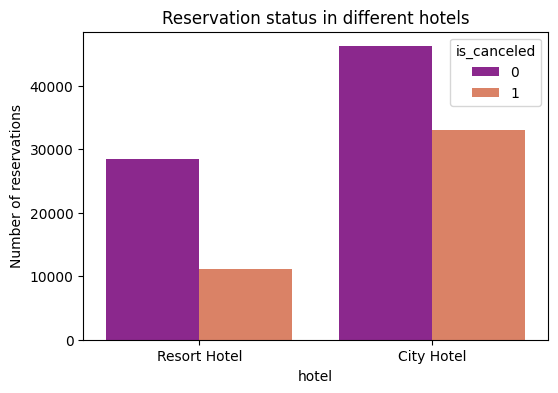

In [18]:
# using countplot to show which hotel has most cancellation rate
plt.figure(figsize=(6,4))
plt.title('Reservation status in different hotels')
plt.xlabel("hotel")
plt.ylabel("Number of reservations")
sns.countplot(x='hotel',hue='is_canceled',data=data, palette='plasma')  # hue argument to compare counts across another category: sns.countplot(data=df, x='column_name', hue='another_column'). 
plt.show()

In [19]:
# to check percentage of cancellation and not cancellations
resort_hotel=data[data['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [20]:
city_hotel=data[data['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)
# most of the cancellations occur in city hotel as compared to resort hotel

is_canceled
0    0.582911
1    0.417089
Name: proportion, dtype: float64

In [21]:
# does price difference in both hotel is reason of cancellation
resort_hotel = resort_hotel.groupby('reservation_status_date')['adr'].mean()  # adr=average daily rate
city_hotel = city_hotel.groupby('reservation_status_date')['adr'].mean()  # adr=average daily rate

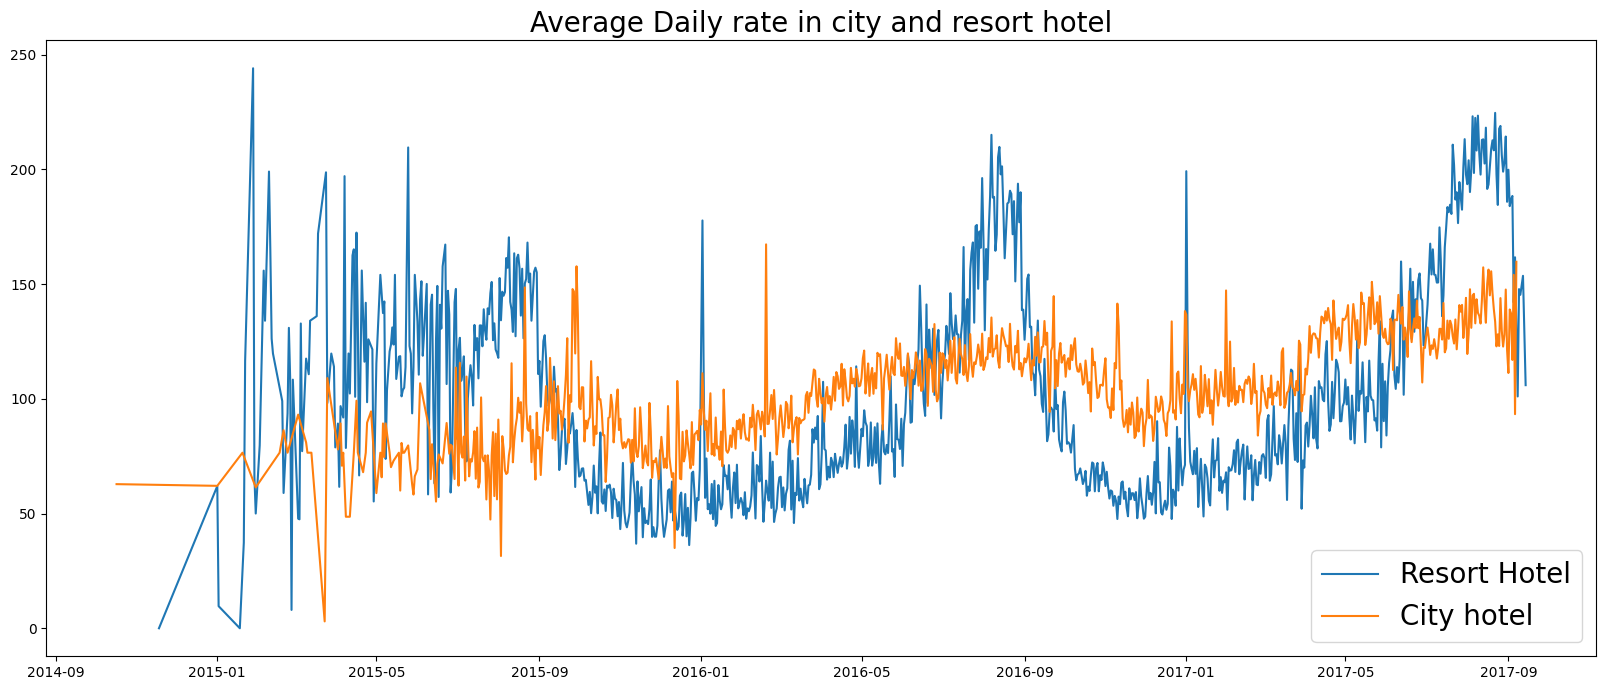

In [22]:
# Visualization of adr for both city and resort hotel
plt.figure(figsize=(20,8))
plt.title("Average Daily rate in city and resort hotel", fontsize=20)
plt.plot(resort_hotel.index,resort_hotel.values,label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel.values,label='City hotel')
plt.legend(fontsize=20)
plt.show()

# this graph proves our hypothesis that city hotel prices are less than resort hotel for some days.

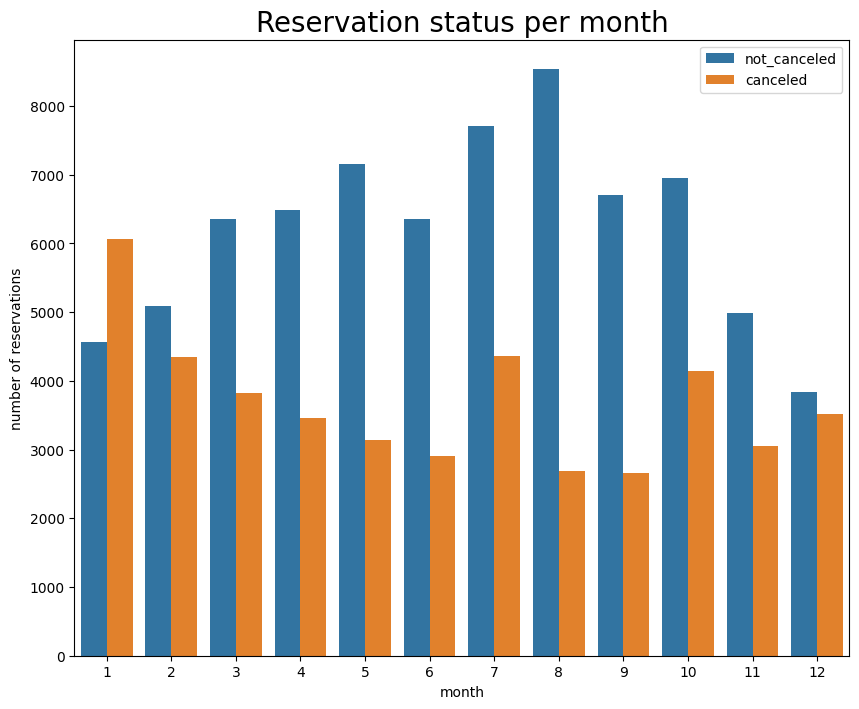

In [23]:
# Which month has high reservations and cancellation rates
# Extracting months from date column
data['month']= data['reservation_status_date'].dt.month
plt.figure(figsize=(10,8))
ax1=sns.countplot(x='month', hue='is_canceled', data=data)

plt.title("Reservation status per month", size=20)
plt.xlabel('month')
plt.ylabel("number of reservations")
plt.legend(["not_canceled",'canceled'])
plt.show()


# most of the cancellations occur in january and less in september while
# most of the reservations occur in august and less in january 
# final insight: August is high reservation month but why due to low price so to view price effect we will plot adr for each month

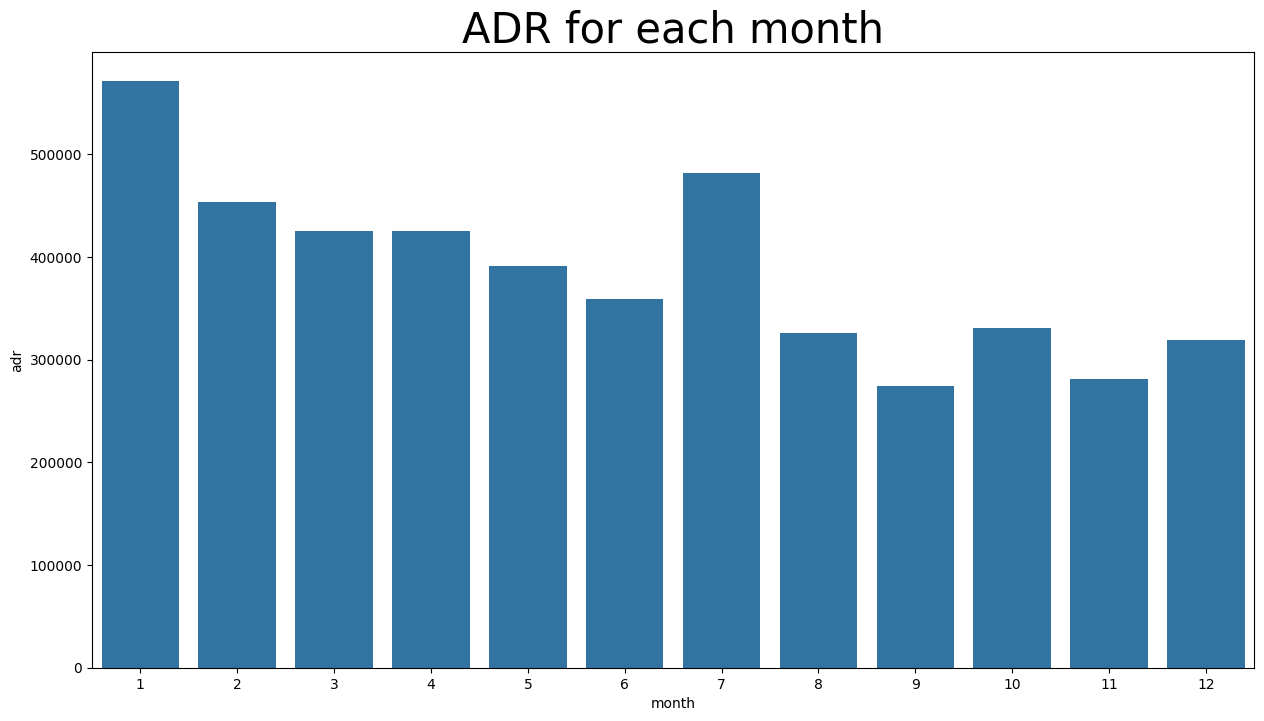

In [24]:
# check price effect on cancellation on month
plt.figure(figsize=(15,8))
plt.title("ADR for each month", fontsize= 30)
sns.barplot(x='month',y='adr',data=data[data['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

# the cancellation really depend on price in january prices are high so cancellations are high in september both price and cancellations are low.
# higher prices means higher cancellations.

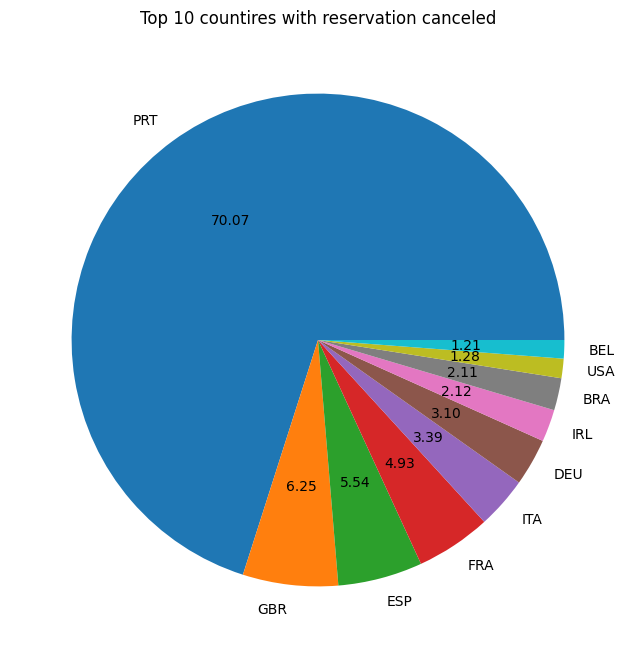

In [ ]:
# Which country has more cancellation rates(only 10 out of 177 countries)
cancelled_data=data[data['is_canceled']==1]
top_10_countries=cancelled_data['country'].value_counts()[:10]  # prints in descending order
plt.figure(figsize=(8,8))
plt.title("Top 10 countires with reservation canceled")
plt.pie(top_10_countries,autopct='%.2f',labels=top_10_countries.index)
plt.show()

# prt=portugal have highest cancellation rate.

# should increase facilities in hotels in portugal, decrease prices, provide promotional discounts, and make advertisements


In [ ]:
# To check our hypothesis whether major clients come from offline
data['market_segment'].value_counts(ascending=False)
#TA=travel agents

# our hypothesis is declared wrong as most of clients use online TA

market_segment
Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [ ]:
data['market_segment'].value_counts(ascending=False,normalize=True)

market_segment
Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [ ]:
# analysing of which mode customers cancel more
cancelled_data['market_segment'].value_counts(normalize=True)

# most of the cancelling clients use online TA
# so reasons may be 1. may be images,facilities mentioned on websites are very good but ground reality is not same as shown in website.
# online show the same way hotel is don't showoff or use filtered images or mention extra facilities

market_segment
Online TA        0.469685
Groups           0.273979
Offline TA/TO    0.187484
Direct           0.043485
Corporate        0.022150
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

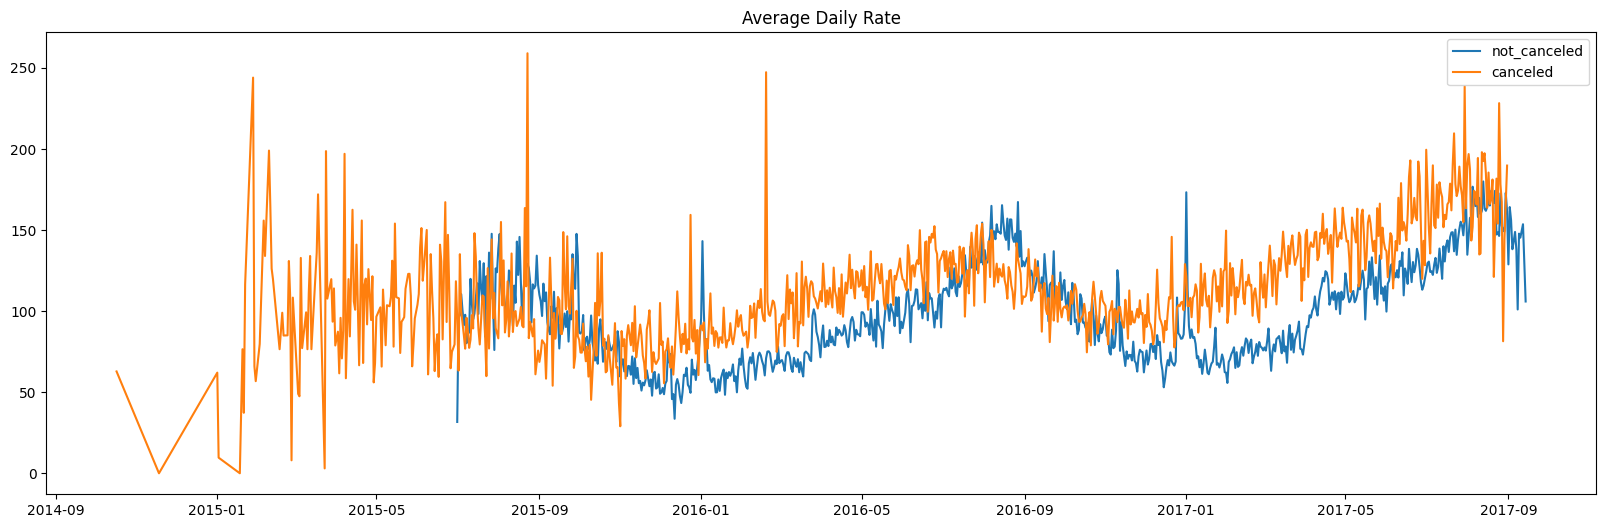

In [ ]:
not_cancelled_data=data[data['is_canceled']==0]
# prices of canceled or non-cancelled which have high
cancelled_data_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace=True)
cancelled_data_adr.sort_values('reservation_status_date',inplace=True) # sorted w.r.t reservation_status_date

not_cancelled_data_adr=not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace=True)
not_cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title("Average Daily Rate")
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'],label='not_canceled')
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='canceled')
plt.legend()
plt.show()

In [ ]:
# we will remove inconsistency in data as data before 2016 and after 2017 is very low so we will remove that data.
cancelled_data_adr=cancelled_data_adr[(cancelled_data_adr['reservation_status_date']>'2016') & (cancelled_data_adr['reservation_status_date']<'2017-09')]
not_cancelled_data_adr=not_cancelled_data_adr[(not_cancelled_data_adr['reservation_status_date']>'2016') & (not_cancelled_data_adr['reservation_status_date']<'2017-09')]

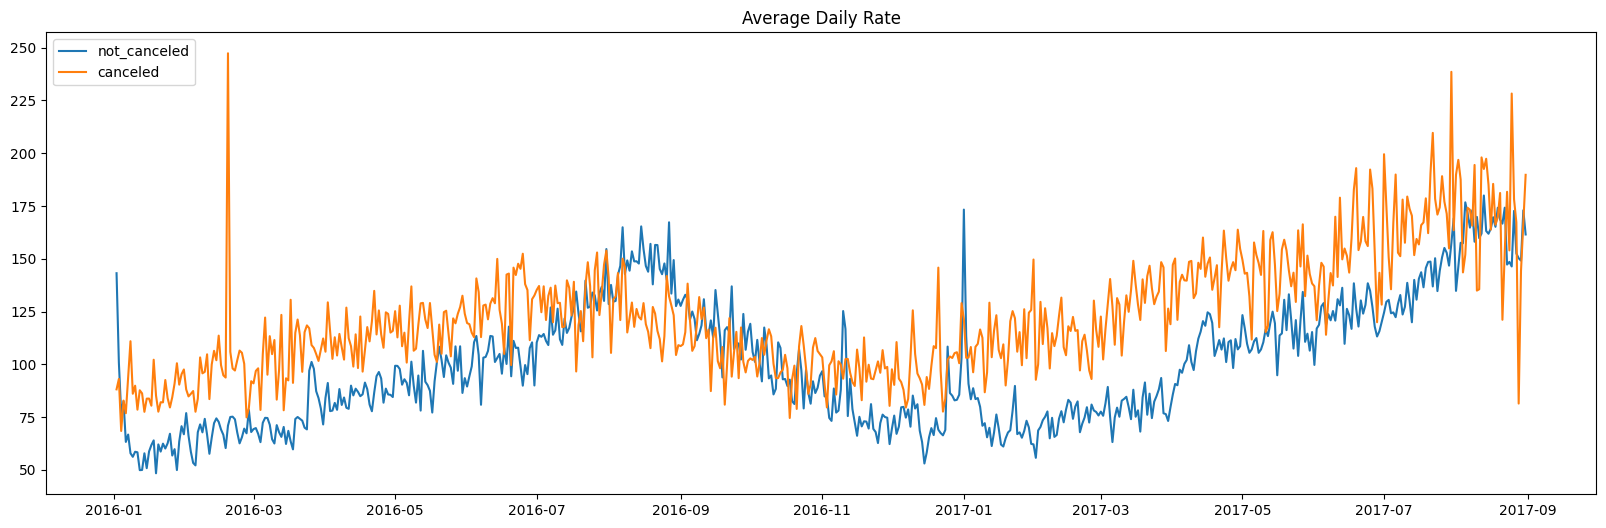

In [ ]:
# again print the same plot
plt.figure(figsize=(20,6))
plt.title("Average Daily Rate")
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'],label='not_canceled')
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='canceled')
plt.legend()
plt.show()

# so this again proves that adr is the reason that is highly becoming cause of cancellation rates
# these sudden high prices showes the weekends or last of months(when most people go to hotels)

In [ ]:
# Now last step is presenting the analysis in form of visualizing dashboards and reports
# these reports are story telling with data(describing graphs)